In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics 
import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [25]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
df_test  = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')
df_sub = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')

In [26]:
df_train = df_train.drop(columns=["id"])

# Understanding The Dataset

In [27]:
df_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [28]:
print("Shape: ", df_train.shape)

Shape:  (58645, 12)


## Label Encoding

In [29]:
# Initialize LabelEncoder
le = LabelEncoder()

df_train['person_home_ownership'] = le.fit_transform(df_train['person_home_ownership'])
df_train['loan_intent'] = le.fit_transform(df_train['loan_intent'])
df_train['loan_grade'] = le.fit_transform(df_train['loan_grade'])
df_train['cb_person_default_on_file'] = le.fit_transform(df_train['cb_person_default_on_file'])

In [30]:
df_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_grade                      int64
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [40]:
# Creating the target
x = df_train.drop(columns=['loan_status'])
y = df_train['loan_status']

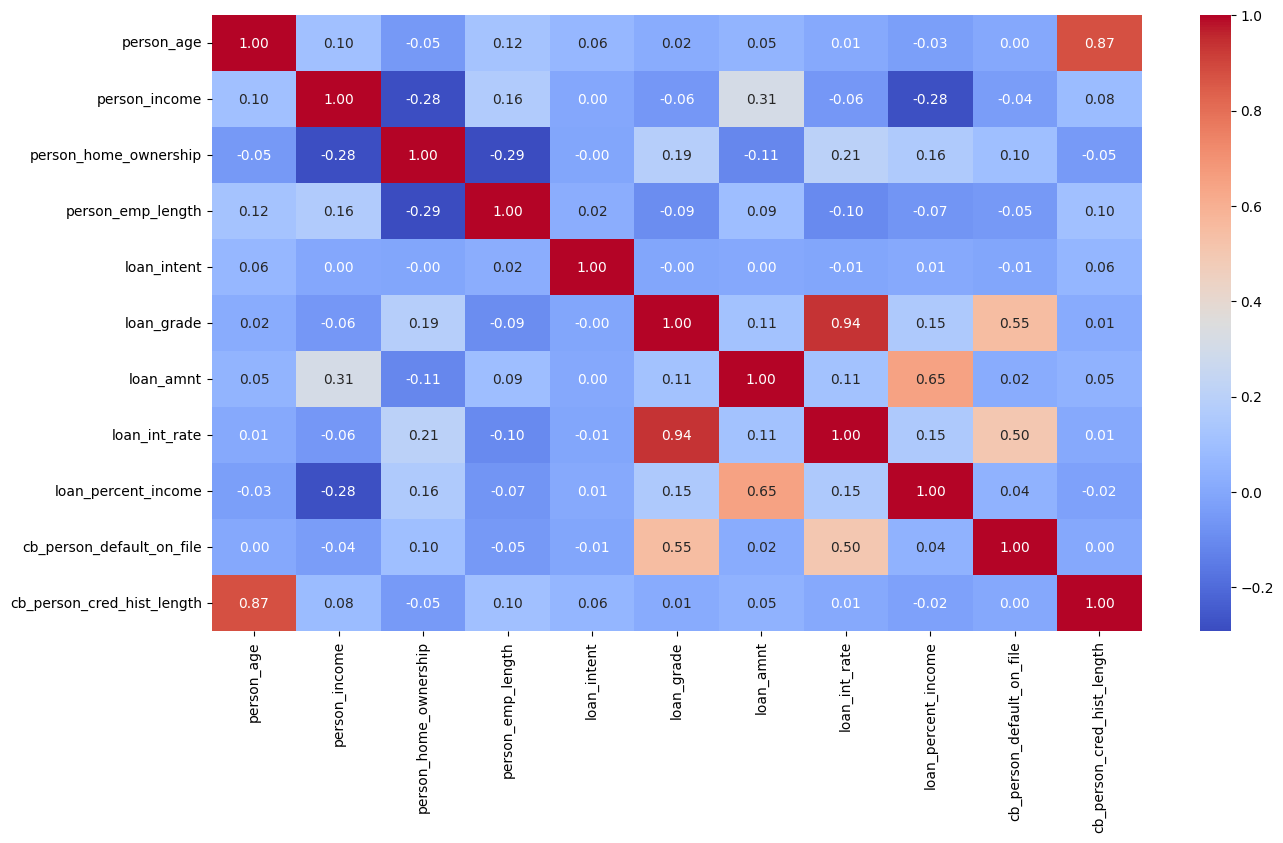

In [33]:
# correlation matrix
corr = x.corr()

# heatmap with seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

## Splitting Dataset

In [34]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# XGBoost

In [ ]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_prob = xgb_model.predict_proba(X_test)[:, 1]

## ROC Curve

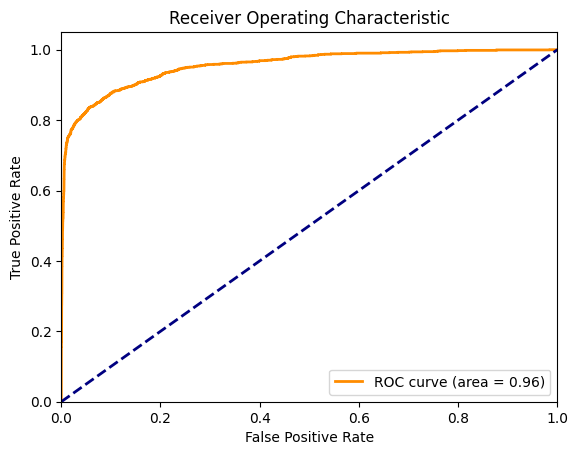

In [35]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Validation

## Preparing the Dataset

In [36]:
testids = df_test["id"]
df_test = df_test.drop(columns=["id"])
df_test.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [37]:
df_test['person_home_ownership'] = le.fit_transform(df_test['person_home_ownership'])
df_test['loan_intent'] = le.fit_transform(df_test['loan_intent'])
df_test['loan_grade'] = le.fit_transform(df_test['loan_grade'])
df_test['cb_person_default_on_file'] = le.fit_transform(df_test['cb_person_default_on_file'])

# Submission

In [38]:
testpred = xgb_model.predict_proba(df_test)[:, 1]
predictions_df = pd.DataFrame({
    'id': testids,
    'predictions': testpred
})

In [39]:
predictions_df.to_csv('submission.csv', index=False)